### Week 10-5 CNN을 이용한 감성 분석 - 한글 Lab

1. Kakao Map에서 수집된 식당 리뷰를 전처리한 파일 poi_review_result_10000.csv을 열어서 review_df에 저장하시오.

In [1]:
# 데이터 읽기

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week10')
review_df=pd.read_csv("poi_review_result_10000.csv")

review_df

id                                            content  label  \
0     139363  한번 가 봤는데 떡 식감이 너무 안좋았음. 떡볶이 쏘스도 별로였음. 단 참치 주먹밥...      0   
1     155416                        싸고 맛있고 최고 분짜도 갠춘 다만 팟타이는 별로      1   
2     148176                                      가격 감안해도 참 맛없음      0   
3     143040                                     직원들 불친절함 바쁜건가?      0   
4      71857  9/4 밤에 알바하시는 남자 알바분 엄청 불친절하고 손님이 와도 나와보지도 않아요&...      0   
...      ...                                                ...    ...   
9995   68650  딤섬이 많이 나오는 코스요리로 먹었는데 새우가 메인인 딤섬이 많이 나왔어요! 새우 ...      1   
9996   44456              막국수는 양념이 약간 매운데  맛은 다른 막국수집보다 맛있어요 !!      1   
9997   59999                                             발견했다!!      1   
9998   70944  이집 딵건 모르겠는데  팔보채는  비싸고 맛 더럽게 없음 . 팔보채 포장주문 햇는데...      0   
9999   51999                                닭 맛없고 손님응대도 별로네요...      0   

                                              content_n  
0     [['한번', '떡', '식감', '너무', '좋다', '떡볶이', '소스', '별...  
1     [['싸다', '맛있다', '최고', '분', '짜다', '갠', '추다', '팟타...  
2                           [['가격', '감안', '차다', '맛없다']]  
3                        [['직원', '불친절하다', '바쁘다', '건가']]  
4     [['밤', '아르바이트', '남자', '알바', '엄청', '불친절하다', '손님...  
...                                                 ...  
9995  [['딤섬', '많이', '나오다', '코스', '요리', '먹다', '새우', '...  
9996      [['막국수', '양념', '맵다', '맛', '막국수', '집', '맛있다']]  
9997                                           [['발견']]  
9998  [['이집', '딵건', '모르다', '팔보채', '비싸다', '맛', '더럽다',...  
9999                   [['닭', '맛없다', '손님', '응대', '별로']]  

[10000 rows x 4 columns]

2. label 컬럼 값들의 분포를 그리시오.

<AxesSubplot:>

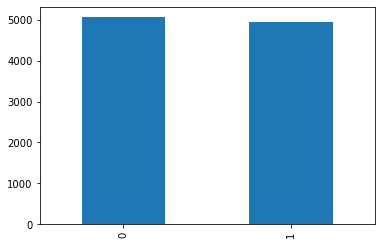

In [2]:
review_df['label'].value_counts().plot(kind='bar')

3. 분류 모델의 성능을 평가하는 함수 get_clf_eval을 작성하시오.

In [3]:
# 성능 평가 함수(앞과 동일)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

4. content 컬럼으로 감성 분석을 하기 위해서 훈련 데이터와 테스트 데이터를 분할하시오.

5. 훈련 데이터 리뷰의 단어 수 분포를 구하시오.

6. 훈련 데이터의 단어 수 분포를 그래프로 그리시오.

7. 훈련 데이터를 CNN 모형에 입력할 수 있도록 인코딩하시오. 또 MAX_SEQUENCE_LENGTH를 100으로 하시오.

8. 테스트 데이터를 CNN 모형에 입력할 수 있도록 인코딩하시오.

9. CNN 모델을 만들기 위해 필요한 패키지를 가져오고 하이퍼 파라미터를 정의하시오.

10. 클래스 형태로 CNN 모델을 정의하시오.

11. 모형 인스턴스를 생성하고 학습에 대하여 정의하시오.

12. 체크포인트를 정의하시오. 또 에폭별 가중치를 저장할 수 있도록 준비를 하시오.

13. 모델을 학습하시오.

14. 학습 과정의 정확도와 loss를 그래프로 그리시오.

15. 최상의 가중치를 가져오고, 이 모델을 이용하여 테스트 집합에 대한 예측을 수행하시오.

16. 성능을 평가하시오.